In [2]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
from matplotlib import font_manager, rc
import platform
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# 그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats
# 사이킷런 ≥0.20 필수 : 0.20에서 데이터 변환을 위한 Transformer클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈련용 데이터가
# 자주 변경이 되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)

import pandas as pd


## DBSCAN

[[-0.021  0.406]
 [ 0.977 -0.458]
 [ 0.904 -0.377]
 ...
 [ 1.663 -0.308]
 [-0.944  0.328]
 [ 0.794  0.608]]


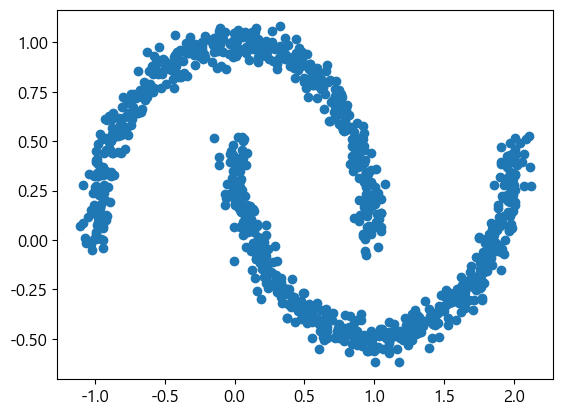

In [12]:
# 반달 모양의 데이터 생성
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples = 1000, noise = 0.05, random_state=42)
print(X)
plt.scatter(x = X[:,0], y=X[:,1])

In [6]:
# eps을 0.05 그리고 min_samples를 5로 설정해서 DBSCAN 수행
from sklearn.cluster import DBSCAN

# 모델 생성 및 훈련
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# 군집된 결과 확인 - (-1)은 잡음 포인트(이상치)
print(dbscan.labels_[:20])

[ 0  2 -1 -1  1  0  0  0  2  5  2  3  0  2  2  2  4  2  2  4]


In [9]:
# 핵심 포인트의 개수 확인
print(len(dbscan.core_sample_indices_))

# 핵심 포인트의 실제 값 확인
print(dbscan.components_)

808
[[-0.021  0.406]
 [-0.842  0.531]
 [ 0.589 -0.321]
 ...
 [ 1.663 -0.308]
 [-0.944  0.328]
 [ 0.794  0.608]]


In [10]:
# 클러스터의 종류 확인
print(np.unique(dbscan.labels_))

[-1  0  1  2  3  4  5  6]


In [13]:
# eps를 0.05에서 0.2로 조정해보기

# eps을 0.2 그리고 min_samples를 5로 설정해서 DBSCAN 수행
from sklearn.cluster import DBSCAN

# 모델 생성 및 훈련
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# 군집된 결과 확인 - (-1)은 잡음 포인트(이상치)
print(dbscan.labels_[:20])

# 핵심 포인트의 개수 확인
print(len(dbscan.core_sample_indices_))

# 핵심 포인트의 실제 값 확인
print(dbscan.components_)

# 클러스터의 종류 확인
print(np.unique(dbscan.labels_))


[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1]
1000
[[-0.021  0.406]
 [ 0.977 -0.458]
 [ 0.904 -0.377]
 ...
 [ 1.663 -0.308]
 [-0.944  0.328]
 [ 0.794  0.608]]
[0 1]


## DBSCAN 군집 결과 시각화

In [22]:
import matplotlib.pyplot as plt
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True

    # 이상치는 반대로 설정
    anormalies_mask = dbscan.labels_ == -1

    # 핵심 포인트도 아니고 이상치도 아닌 이웃 포인트
    non_core_mask = ~(core_mask | anormalies_mask)


    cores = dbscan.components_
    anomalies = X[anormalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


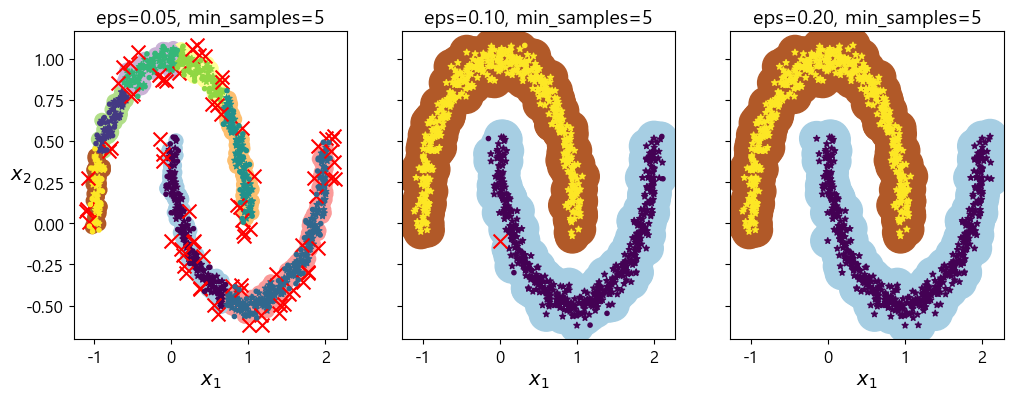

In [23]:
# 엡실론 조정
dbscan1 = DBSCAN(eps=0.05)
dbscan1.fit(X)
dbscan2 = DBSCAN(eps=0.1)
dbscan2.fit(X)
dbscan3 = DBSCAN(eps=0.2)
dbscan3.fit(X)
    
plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_dbscan(dbscan1, X, size=100)

plt.subplot(132)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.subplot(133)
plot_dbscan(dbscan3, X, size=600, show_ylabels=False)
plt.show()

In [24]:
# 새로운 데이터에 대한 예측
from sklearn.neighbors import KNeighborsClassifier
 
# 군집한 결과를 가지고 분류 모델이 훈련
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan3.components_, dbscan3.labels_[dbscan3.core_sample_indices_])
# dbscan3.components_ -> 타겟, dbscan3.labels_[dbscan3.core_sample_indices_] -> 훈련 할 데이터


KNeighborsClassifier(n_neighbors=50)

In [25]:
X_new = np.array([[-0.5,0],[0,0.5]])
# 새로운 데이터를 이용한 예측
y_hat = knn.predict(X_new)
print(y_hat)
# 확률
y_hat_proba = knn.predict_proba(X_new)
print(y_hat_proba)


[1 0]
[[0.18 0.82]
 [1.   0.  ]]


### KMeans & GMM(Gaussian Mixture) & DBSCAN

### DataFrame과 클러스터링 된 결과를 받아서 시각화 하기 위한 함수

In [39]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    # 클러스터의 중앙점 찾기
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    # 클러스터 순회
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]

        if label == -1 :
            cluster_legend = 'Noise'
            isNoise = True
        else :
            cluster_legend = 'Cluster' + str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                    s=70, edgecolor = 'k', marker=markers[label],
                    label = cluster_legend)
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250,
                        color='white', edgecolor='k', marker='$%d$' % label)
        
    if isNoise:
        legend_loc = 'upper center'
    else :
        legend_loc = 'upper right'
    plt.legend(loc=legend_loc)
    plt.show()



### 샘플 데이터 생성

[-1.112 -1.11  -1.101 ...  1.073  1.105  1.126]


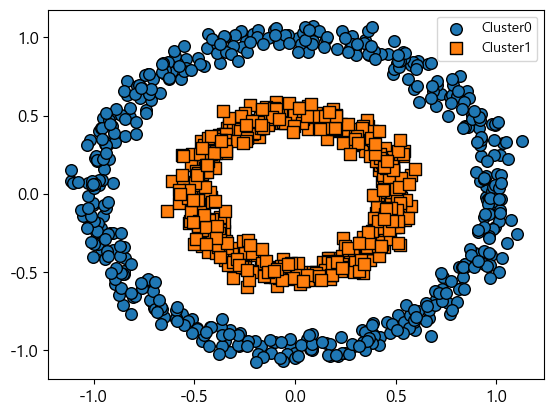

In [40]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0,
                    factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
print(np.unique(clusterDF))

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

### KMeans 적용

c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


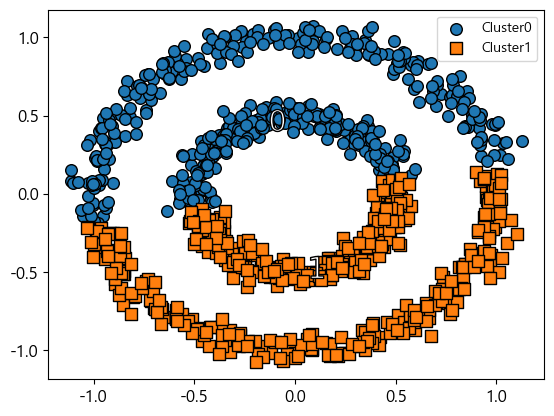

In [43]:
#  KMeans 적용 - 클러스터의 개수를 2개로 설정 : 데이터가 좌우나 위아래로 분할
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster',iscenter=True)

### GMM 적용

c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


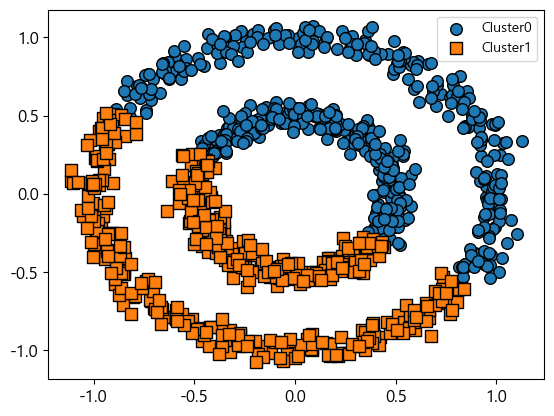

In [44]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)



### DBSCAN

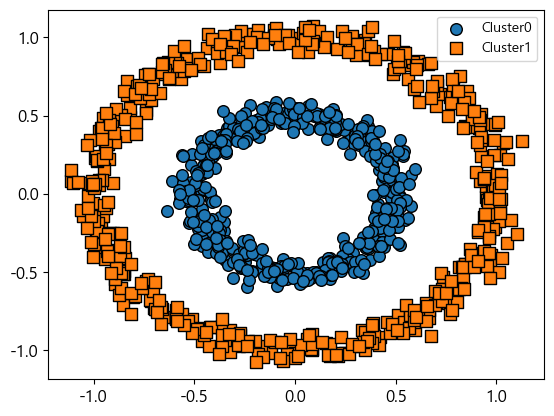

In [45]:
from sklearn.cluster import DBSCAN

dbscan =  DBSCAN(eps = 0.2, min_samples=7)
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)


## BIRCH - 대규모 데이터 세트를 빠르게 군집하는 알고리즘

In [52]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

from sklearn.cluster import Birch
brc = Birch(n_clusters = 3)
brc.fit(X)


Birch()

In [53]:
print(iris.target)
y_hat = brc.predict(X)
print(y_hat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


### 차원 축소

## PCA

### 특이값 분해(SVD)를 이용한 행렬 분해

In [77]:
# 3차원 데이터 생성
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
#print(X)

#SVD를 이용한 주성분 구하기
X_centered = X - X.mean(axis=0)
# 특이값 분해 수행 (U, s Vt 이렇게 3개의 행렬로 분해)
U, s, Vt = np.linalg.svd(X_centered)
print(U.shape) #(60, 60)
print(s.shape) #(3,)
print(Vt.shape) #(3, 3)

# 주성분
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]
#print(c1)
#print(c2)

# 실제 변환된 결과
# 2차원으로 투영
W2 = Vt.T[:,2]
X2D = X_centered.dot(W2)
#print(X2D)


(60, 60)
(3,)
(3, 3)
[[ 0.936  0.299  0.185]
 [-0.34   0.901  0.268]
 [-0.086 -0.314  0.945]]


In [6]:
# sklearn의 PCA가 SVD를 이용
m = 60
w1, w2 = 0.1, 0.3 #데이터 변환을 위한 가중치(아무 숫자나 가능)
noise = 0.1 #잡음(아무 숫자나 가능)
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))

X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# print(X)

from sklearn.decomposition import PCA
# 2개의 주성분을 추출해주는 PCA 인스턴스
pca = PCA(n_components=2)
# 데이터의 차원을 2차원으로 줄이기
X2D = pca.fit_transform(X)
print(X2D)


[[-0.461  0.675]
 [-1.072  0.139]
 [-0.989 -0.069]
 [-0.783 -0.247]
 [-0.665  0.523]
 [ 0.835 -0.175]
 [ 0.901 -0.241]
 [-0.925 -0.286]
 [ 0.091 -0.348]
 [-0.712  0.492]
 [-0.659 -0.322]
 [ 1.37   0.161]
 [ 0.681 -0.282]
 [-0.737  0.554]
 [ 1.349  0.282]
 [ 0.737 -0.316]
 [-0.407 -0.321]
 [ 0.836 -0.222]
 [-0.842  0.233]
 [ 0.048 -0.359]
 [ 0.309 -0.491]
 [ 1.384  0.425]
 [-0.583  0.442]
 [-0.829 -0.314]
 [ 1.384  0.314]
 [-1.019  0.1  ]
 [ 1.264  0.062]
 [-0.318  0.809]
 [-0.507  0.649]
 [-0.883 -0.067]
 [ 1.125 -0.089]
 [-0.783  0.519]
 [-0.707 -0.201]
 [-0.813  0.377]
 [-1.023  0.149]
 [-0.119 -0.415]
 [-0.926 -0.14 ]
 [-0.91   0.173]
 [-0.647 -0.231]
 [ 0.887 -0.235]
 [-0.785  0.406]
 [-0.355 -0.339]
 [-1.034 -0.029]
 [-0.829 -0.218]
 [ 1.271 -0.055]
 [ 1.395  0.347]
 [-1.056  0.072]
 [ 0.547 -0.288]
 [ 0.75  -0.308]
 [ 1.464  0.097]
 [ 1.346  0.278]
 [-0.395 -0.392]
 [ 1.298  0.475]
 [ 1.276  0.434]
 [-0.24  -0.473]
 [ 0.053 -0.408]
 [ 0.759 -0.201]
 [-0.721 -0.267]
 [ 0.59  -0.33

In [79]:
# 분산의 비율
print("설명 가능한 분산의 비율 : ", pca.explained_variance_ratio_)

# [0.892 0.102]
# 첫 번째 주성분이 0.892만큼의 분산을 설명
# 두 번째 주성분은 0.102 만큼의 분산을 설명
# 2개의 주성분이 있으면 0.992만큼의 분산을 설명
print("잃어버린 분산의 비율 : " ,(1-pca.explained_variance_ratio_.sum()))

설명 가능한 분산의 비율 :  [0.892 0.102]
잃어버린 분산의 비율 :  0.006384091863154695


In [81]:
# 3차원 데이터 생성
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


#원본 데이터 5개 출력
print(X[:5])
pca = PCA(n_components=2)
# 데이터의 차원을 2차원으로 줄이기
X2D = pca.fit_transform(X)
# 2차원으로 줄어든 데이터를 이용해서 복원
X3D_inverse = pca.inverse_transform(X2D)
print(X3D_inverse[:5])





[[-1.016 -0.551 -0.261]
 [-0.008  0.6    0.035]
 [-0.953 -0.465 -0.249]
 [-0.92   0.21   0.022]
 [-0.763  0.158  0.192]]
[[-1.015 -0.547 -0.274]
 [-0.021  0.551  0.181]
 [-0.954 -0.467 -0.242]
 [-0.917  0.221 -0.01 ]
 [-0.746  0.22   0.005]]


In [84]:
# 2개의 배열이 같은지 확인
print(np.allclose(np.array([1,2,3]), np.array([1,2,3]))) # 같으면 True
print(np.allclose(X, X3D_inverse)) # 이 경우는 다르기 때문에 False

True
False


In [85]:
# 오차의 평균
print(np.mean(np.sum(np.square(X3D_inverse - X), axis=1)))

0.010170337792848549


In [86]:
# 각각의 오차 구하기
print(X3D_inverse - X)

[[ 1.194e-03  4.350e-03 -1.309e-02]
 [-1.332e-02 -4.850e-02  1.459e-01]
 [-6.234e-04 -2.271e-03  6.833e-03]
 [ 2.949e-03  1.074e-02 -3.232e-02]
 [ 1.703e-02  6.201e-02 -1.866e-01]
 [ 8.747e-03  3.186e-02 -9.587e-02]
 [ 1.417e-02  5.163e-02 -1.553e-01]
 [ 1.774e-03  6.461e-03 -1.944e-02]
 [ 1.664e-02  6.060e-02 -1.824e-01]
 [-3.344e-03 -1.218e-02  3.665e-02]
 [-2.770e-03 -1.009e-02  3.036e-02]
 [-1.037e-02 -3.779e-02  1.137e-01]
 [ 1.827e-03  6.656e-03 -2.003e-02]
 [ 9.250e-03  3.369e-02 -1.014e-01]
 [-4.816e-03 -1.754e-02  5.278e-02]
 [-4.448e-03 -1.620e-02  4.875e-02]
 [-2.549e-03 -9.283e-03  2.793e-02]
 [-4.055e-03 -1.477e-02  4.445e-02]
 [-3.728e-03 -1.358e-02  4.086e-02]
 [-1.048e-02 -3.817e-02  1.149e-01]
 [ 9.897e-03  3.605e-02 -1.085e-01]
 [-1.512e-02 -5.506e-02  1.657e-01]
 [-8.257e-03 -3.008e-02  9.050e-02]
 [ 2.872e-03  1.046e-02 -3.148e-02]
 [ 8.691e-03  3.166e-02 -9.526e-02]
 [-6.075e-04 -2.213e-03  6.658e-03]
 [-3.985e-03 -1.451e-02  4.367e-02]
 [ 6.537e-04  2.381e-03 -7.1

In [87]:
# 각 행의 오차 합 구하기 - 이를 이용해서 이상치 탐지를 할 수 있음
# 이상치는 복원을 했을 때 오차가 크게 발생
print(np.sum(abs(X3D_inverse - X), axis=1))


[0.019 0.208 0.01  0.046 0.266 0.136 0.221 0.028 0.26  0.052 0.043 0.162
 0.029 0.144 0.075 0.069 0.04  0.063 0.058 0.164 0.154 0.236 0.129 0.045
 0.136 0.009 0.062 0.01  0.049 0.089 0.085 0.115 0.084 0.025 0.161 0.18
 0.077 0.207 0.197 0.246 0.074 0.032 0.232 0.084 0.042 0.101 0.161 0.097
 0.108 0.261 0.128 0.048 0.002 0.025 0.188 0.036 0.119 0.223 0.273 0.008]


In [88]:
# 주성분 확인
print(pca.components_)

[[-0.936 -0.299 -0.185]
 [ 0.34  -0.901 -0.268]]


### 주식 데이터를 이용한 주성분 분석

In [90]:
# 데이터 가져오기
sp500_px = pd.read_csv('./data/data/data/sp500_data.csv.gz', index_col=0)
oil_px = sp500_px[['XOM','CVX']]
print(oil_px.head())

                 XOM       CVX
1993-01-29 -0.016991  0.072921
1993-02-01  0.016991  0.102089
1993-02-02  0.084954  0.029168
1993-02-03  0.067964  0.058337
1993-02-04  0.034378  0.044272


In [96]:
pca = PCA(n_components=2)
pca.fit(oil_px)
# 주성분 분석 결과를 DataFrame으로 생성
loadings = pd.DataFrame(pca.components_, columns=oil_px.columns)
print(loadings)

# 분산의 비율
print("설명 가능한 분산의 비율 : ", pca.explained_variance_ratio_)

        XOM       CVX
0 -0.664711 -0.747101
1  0.747101 -0.664711
설명 가능한 분산의 비율 :  [0.896 0.104]


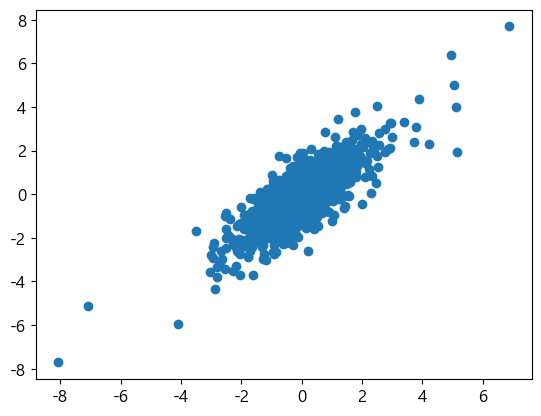

In [93]:
plt.scatter(oil_px['XOM'], oil_px['CVX'])
plt.show()

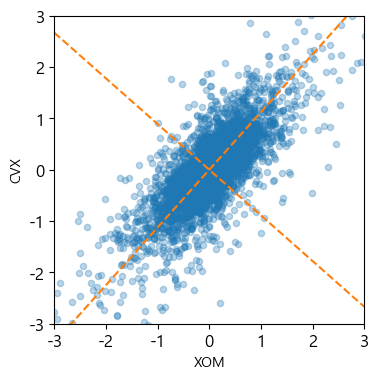

In [95]:
def abline(slope, intercept, ax) :
    x_vals = np.array(ax.get_xlim())
    return(x_vals, intercept + slope * x_vals)
ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4,4))

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0,'XOM'], 0, ax), '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1,'XOM'], 0, ax), '--', color='C1')


plt.show()

### 피처의 중요도를 파악

In [97]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP','JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms] # 2011년 이후 데이터만
print(top_sp.head())


                AAPL       AXP       COP      COST      CSCO       CVX  \
2011-01-03  0.527368  0.093870 -0.336272 -0.240605  0.035704  0.240681   
2011-01-04 -0.154321 -0.431788 -0.463161 -0.171859  0.008926 -0.584516   
2011-01-05  0.597152  0.895406 -0.057104 -0.859307  0.169599  0.446985   
2011-01-06 -0.132850 -0.612646 -0.463161  0.249200  0.035706 -0.919751   
2011-01-07  0.285820 -0.537242 -0.006350 -0.257788  0.098187  0.180511   

                  HD      INTC       JPM      MSFT       SLB       TGT  \
2011-01-03  0.099184 -0.137211  0.512093 -0.061805 -0.325923  0.455646   
2011-01-04 -0.541005  0.025726  0.335894  0.132440 -2.030049 -0.580720   
2011-01-05 -0.054099 -0.214392  0.689468  0.088294  1.536499 -0.482448   
2011-01-06 -0.189354  0.085757  0.070713  0.688689 -1.927614 -0.786210   
2011-01-07 -0.036064 -0.042878 -0.795539 -0.035317  0.931215 -0.089345   

                 USB       WFC       WMT       XOM  
2011-01-03 -0.234866  0.250042  0.294839  0.736805  
2011

In [98]:
# 피처의 중요도를 파악할 것이라서 주성분의 개수를 설정하지 않음
sp_pca = PCA()
sp_pca.fit(top_sp)

PCA()

In [101]:
# 설명 가능한 분산의 비율을 확인
print(sp_pca.explained_variance_ratio_)

print(sp_pca.explained_variance_)

[0.445 0.143 0.105 0.062 0.053 0.042 0.028 0.024 0.021 0.021 0.018 0.015
 0.008 0.007 0.004 0.004]
[3.215 1.037 0.759 0.449 0.384 0.301 0.205 0.175 0.152 0.151 0.129 0.106
 0.06  0.05  0.03  0.026]


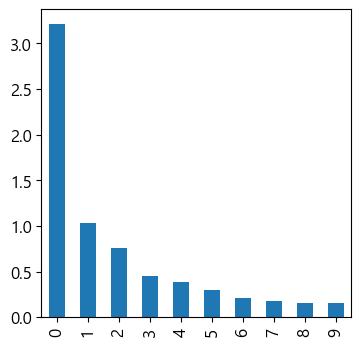

In [106]:
explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4,4))
ax.set_label('COMPONANT')
plt.show()

In [107]:
# 5개의 주성분에 미치는 중요도를 DataFrame으로 생성
loadings = pd.DataFrame(sp_pca.components_[0:5, :], columns=top_sp.columns)
print(loadings)

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0 -0.300825 -0.246332 -0.261529 -0.273634 -0.064059 -0.444490 -0.207983   
1 -0.505116 -0.139426  0.174212 -0.416307 -0.031939  0.289373 -0.278002   
2 -0.786730  0.135458 -0.002367  0.465862 -0.007524  0.082374  0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4  0.111576 -0.596666 -0.005813  0.555529 -0.039860  0.109016 -0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0 -0.076956 -0.196397 -0.105012 -0.481786 -0.148833 -0.116421 -0.145684   
1 -0.033898 -0.040723 -0.053954  0.472494 -0.228123 -0.054796 -0.047427   
2 -0.003518  0.062261  0.016248 -0.194822  0.160833  0.048976  0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4 -0.072047 -0.385160 -0.077135  0.181332 -0.055557 -0.155440 -0.216425   

        WMT       XOM  
0 -0.122304 -0.317952  
1 -0.222889  0.154192  
2  0.175806  0.090167  
3 

c:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


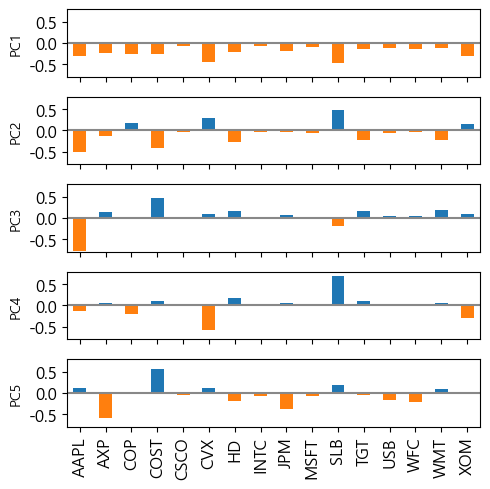

In [110]:
# 스크리 그래프 - 주성분 분석 후 주성분에 대한 피처의 중요도를 시각화
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))
# 세로로 5개의 영역을 만들고 x축을 공유
f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True) # sharex=True 는 x축을 공유하는 옵션

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

plt.show()

### MNIST 이미지에서 적절한 차원 수를 찾고 이미지를 압축해서 출력

In [3]:
# 데이터 가져오기
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(type(mnist.target[0])) # str로 되어있음
mnist.target = mnist.target.astype(np.uint8) # str을 숫자로 변경

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape) # 28*28 = 784


c:\Users\USER\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<class 'str'>
(52500, 784)


In [7]:
# 적절한 차원의 개수를 찾기 위해서 차원의 개수를 설정하지 않고 분산의 비율보다 큰 개수를 찾기(권장하는 방법은 아님)
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # 인덱스는 0부터 시작하니까 1 더해주기(차원은 1부터 시작이니까), argmax : 최대값 위치 반환
print(d)


154


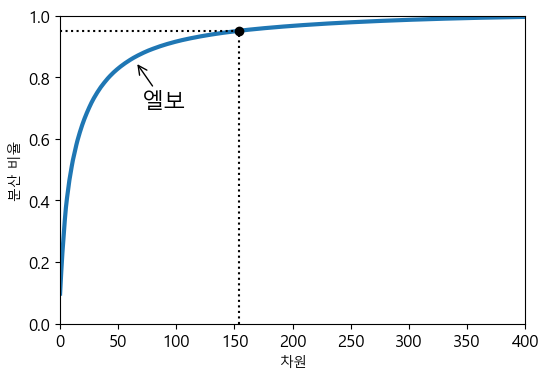

In [8]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0,400,0,1])
plt.xlabel('차원')
plt.ylabel('분산 비율')
plt.plot([d,d],[0,0.95],'k:')
plt.plot([0,d],[0.95,0.95],'k:')
plt.plot(d,0.95,'ko')
plt.annotate("엘보", xy=(65,0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.show()

In [9]:
# 분산 비율이 0.95 이상인 PCA 만들기
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

154
0.9504326468621528


### 복원한 이미지와 원래 이미지를 출력

In [10]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train) # 154로 줄이고
X_recovered = pca.inverse_transform(X_reduced) # 784로 다시 복원
print(X_recovered.shape)

(52500, 784)


In [11]:
# 데이터를 이미지로 출력해주는 함수
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    # 한 줄에 출력할 이미지 개수 설정
    images_per_row = min(len(instances), images_per_row)
    # 1차원 이미지를 2차원으로 재구성
    images = [instance.reshape(size,size) for instance in instances]
    # 행의 개수 계산
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

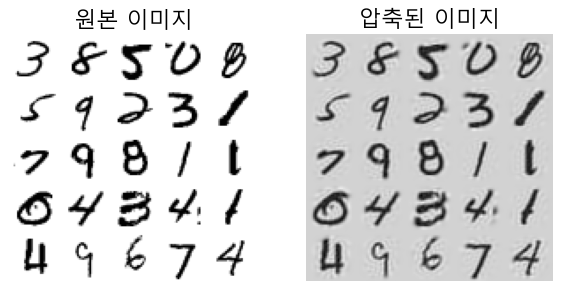

In [17]:
plt.figure(figsize=(7,4))

plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("원본 이미지", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축된 이미지", fontsize=16)

plt.show()

In [18]:
%%time
pca = PCA(n_components=0.95, svd_solver='full')
X_reduced = pca.fit_transform(X_train)

CPU times: total: 25.2 s
Wall time: 3.79 s


In [20]:
%%time
pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = pca.fit_transform(X_train)

CPU times: total: 14 s
Wall time: 2.64 s


In [21]:
%%time
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)

# 80%보다 적기 때문에 randomized로 적용됨

CPU times: total: 14.5 s
Wall time: 2.49 s
